In [112]:
! pip freeze | grep -E "notebook|geo|altair|matplot|seaborn|folium|geo"

altair==1.2.0
folium==0.3.0
geopandas==0.2.1
geopy==1.11.0
matplotlib==1.4.3
notebook==5.0.0
pygeocoder==1.2.5
pygeocodio==0.5.0
seaborn==0.7.1


In [113]:
import numpy as np
import pandas as pd
import re
from altair import Chart, load_dataset, X, Y, Color, Axis, Legend, Scale, SortField
from geocodio import GeocodioClient
client = GeocodioClient('0f669aa4d57d7dab0ba9b8dd049a9957678985d')



In [114]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [115]:
#  dtype={'Funding': np.float64},
kyf2 = pd.read_excel('KYF2 new compass data 2015.xls', na_values="No Data",
                     skip_footer=2, encoding='xlrd', parse_dates=['Year'])


In [121]:
pd.options.display.float_format = '${:,.2f}'.format
pd.options.display.float_format = '${:,.0f}'.format
amount = kyf2.Funding.sum()
print amount
print 'Know Your Farmer, Know Your Food \nGrants and Loans 2009–2014\n',  'TOTAL: ', kyf2.Funding.sum(), 
# pd.options.display.float_format = None
print amount

574277980.457
Know Your Farmer, Know Your Food 
Grants and Loans 2009–2014
TOTAL:  574277980.457 574277980.457


In [122]:
print '--- Count by Year ---'
print kyf2.Year.value_counts().sort_index()

print '--- Count by Funding_Ty value ---'
print kyf2.Funding_Ty.value_counts().sort_index()



--- Count by Year ---
2009-01-01    533
2010-01-01    731
2011-01-01    778
2012-01-01    657
2013-01-01    509
2014-01-01    977
Name: Year, dtype: int64
--- Count by Funding_Ty value ---
Grant     4059
Grants       4
Loan       121
grant        1
Name: Funding_Ty, dtype: int64


In [123]:
kyf2.head(2)

,Title,Name,Abbreviati,Year,Address,State,Town,Zip,Agency,Mission_Ar,...,Beef,Alcohol,Bees,Youth,Beginning Farmers,Organic,Blueberries,Heritage,Soilless,Logo/Branding
0,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2009-01-01,"Anchorage, AK",AK,Anchorage,,RBCS,Rural Development,...,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan
1,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2010-01-01,"Anchorage, AK",AK,Anchorage,,RBCS,Rural Development,...,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan


In [124]:
incorrect_spellings =['Small and Socially Disadvantaged Producer Grants']
correct_spellings = ['Small Socially Disadvantaged Producer Grants']
corrections = pd.Series(data=correct_spellings, index=incorrect_spellings)

kyf2.replace(corrections, inplace=True)
kyf2[kyf2.Name.str.startswith('Small')]


,Title,Name,Abbreviati,Year,Address,State,Town,Zip,Agency,Mission_Ar,...,Beef,Alcohol,Bees,Youth,Beginning Farmers,Organic,Blueberries,Heritage,Soilless,Logo/Branding
60,Alabama State Association of Cooperatives,Small Socially Disadvantaged Producer Grants,SSDPG,2011-01-01,"36740, Forkland, AL",AL,Forkland,36740,RBCS,Rural Development,...,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan
251,California Center for Cooperative Development,Small Socially Disadvantaged Producer Grants,SSDPG,2012-01-01,"95616, Davis, CA",CA,Davis,95616,RBCS,Rural Development,...,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan
518,Arkansas Valley Organic Growers,Small Socially Disadvantaged Producer Grants,SSDPG,2010-01-01,"Fowler, CO",CO,Fowler,,RBCS,Rural Development,...,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan
572,"Southwest Development Center, Inc.",Small Socially Disadvantaged Producer Grants,SSDPG,2014-01-01,7900 East Union Ave,CO,DENVER,80237,RBCS,Rural Development,...,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan
615,Solar Refrigeration,Small Business Innovation Research,SBIR,2014-01-01,68 Winterhill Road,CT,Madison,06443,NIFA,"Research, Education and Economics",...,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan
619,Use of Hydroponic and LED Technology to Grow H...,Small Business Innovation Research,SBIR,2011-01-01,"06850, Norwalk, CT",CT,Norwalk,06850,NIFA,"Research, Education and Economics",...,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$1,$nan
841,Aquaculture,Small Business Innovation Research,SBIR,2014-01-01,824 Gulick Ave.,HI,Honolulu,96819,NIFA,"Research, Education and Economics",...,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan
1227,Value-Added Multi-Purpose Processing Establish...,Small Business Innovation Research,SBIR,2010-01-01,"46035, Colfax, IN",IN,Colfax,46035,NIFA,"Research, Education and Economics",...,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan
1232,A CSA Model to Bring Locally Grown Foods to th...,Small Business Innovation Research,SBIR,2009-01-01,"66716, Bronson, KS",KS,Bronson,66716,NIFA,"Research, Education and Economics",...,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan
1318,Production and Marketing of a Novelty Specialt...,Small Business Innovation Research,SBIR,2011-01-01,"42544, Nancy, KY",KY,Nancy,42544,NIFA,"Research, Education and Economics",...,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan,$nan


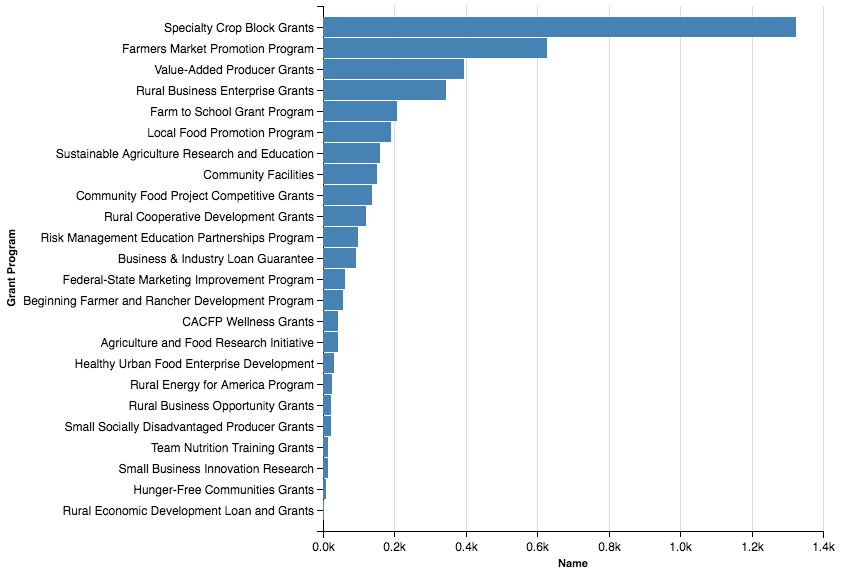

In [125]:
grantor = pd.DataFrame(kyf2['Name'].value_counts())
grantor.reset_index(inplace=True)
Chart(grantor).mark_bar().encode(y=Y('index', sort=SortField(field='Name', order='ascending'),
        axis=Axis(title='Grant Program')), x='Name').configure_axis(tickLabelFontSize=12, labelMaxLength=300)



In [126]:
described = kyf2.describe()
counts = described.iloc[0:1,3:]
counts[counts.columns] = counts[counts.columns].astype(int)
count_df = counts.T.sort_values('count')
count_df.reset_index(inplace=True)
print count_df
described



                index  count
0                Bees     18
1            Soilless     21
2         Blueberries     27
3            Heritage     31
4                Beef     67
5       Logo/Branding     75
6             Tourism     82
7        Food Deserts     85
8             Alcohol    112
9   Beginning Farmers    129
10            Organic    130
11            Cooking    207
12              Youth    510


,Funding,X,Y,Cooking,Tourism,Food Deserts,Beef,Alcohol,Bees,Youth,Beginning Farmers,Organic,Blueberries,Heritage,Soilless,Logo/Branding
count,"$4,176","$4,185","$4,185",$207,$82,$85,$67,$112,$18,$510,$129,$130,$27,$31,$21,$75
mean,"$137,519",$-92,$39,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1
std,"$533,938",$22,$7,$0,$0,$0,$0,$0,$0,$0,$0,$0,$0,$0,$0,$0
min,$392,$-171,$-14,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1
25%,"$25,000",$-105,$36,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1
50%,"$52,010",$-89,$40,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1
75%,"$99,960",$-79,$43,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1
max,"$19,700,000",$145,$65,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1,$1


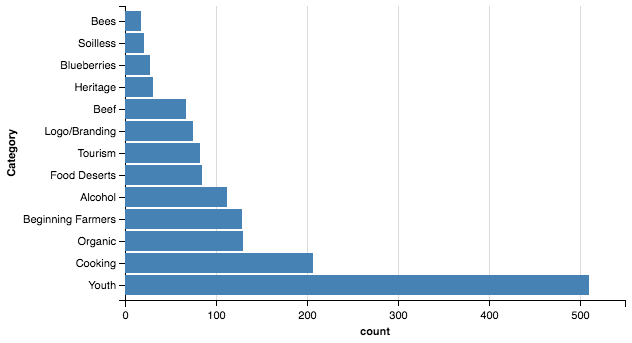

In [127]:
# unsorted version: Chart(count_df).mark_bar().encode(y='index', x='count')

Chart(count_df).mark_bar().encode(y=Y('index', sort=SortField(field='count', order='ascending', op='sum'),
        axis=Axis(title='Category')), x='count')
   


In [128]:
# convert categories to boolean values
bool_columns = ['Cooking','Tourism','Food Deserts','Beef','Alcohol','Bees','Youth',
                'Beginning Farmers','Organic','Blueberries', 'Heritage','Soilless','Logo/Branding']
kyf2[bool_columns] = kyf2[bool_columns].fillna(value=0)
kyf2[bool_columns] = kyf2[bool_columns].astype(int)


Grants vs. Loans

In [171]:
# create a new column that normalizes the funding type

# this regular expression finds "Grant", "grant" and "Grants"
grantre = re.compile('grant.?', re.IGNORECASE)
# np.where(re.match(grantre, kyf2.Funding_Ty))
# kyf2.Funding_Ty.to_replace(grantre, "Grant")


kyf2['grant'] = np.where(kyf2.Funding_Ty.str.contains(grantre), 1,0)
print "Grants: ", sum(kyf2['grant'])
kyf2['loan'] = np.where(kyf2.Funding_Ty.str.contains('Loan'), 1,0)
print "Loans: ", sum(kyf2['loan'])
kyf2['grant_loan'] = np.where(kyf2.Funding_Ty.str.contains(grantre), "Grant","")
kyf2['grant_loan'] = np.where(kyf2.Funding_Ty.str.contains("Loan"), "Loan",kyf2['grant_loan'])
kyf2['grant_loan'].value_counts(dropna=False)
kyf2[['Funding_Ty','grant_loan']].sample(20).head(20)

Grants:  4058
Loans:  118


,Funding_Ty,grant_loan
3738,Grant,Grant
2976,Grant,Grant
2150,Grant,Grant
3415,Grant,Grant
2896,Grant,Grant
3514,Grant,Grant
1142,Grant,Grant
1041,Grant,Grant
1452,Grant,Grant
4130,Grant,Grant


In [172]:
funding_bar_data = kyf2[['Funding','Year', 'grant_loan']].copy()

# pd.set_option('display.float_format', lambda x: '$%.0f' % x)
pd.options.display.float_format = '${:,.0f}'.format
print funding_bar_data.groupby(['Year','grant_loan']).sum()

                          Funding
Year       grant_loan            
2009-01-01 Grant      $40,178,873
           Loan        $8,514,000
2010-01-01 Grant      $68,722,840
           Loan       $40,501,736
2011-01-01 Grant      $71,393,993
           Loan       $44,840,919
2012-01-01 Grant      $63,616,001
           Loan       $11,232,500
2013-01-01 Grant      $44,199,998
           Loan       $44,532,900
2014-01-01 Grant      $76,778,294
           Loan       $59,765,927


In [173]:
pd.options.display.float_format = None

In [174]:
grants_chart = Chart(funding_bar_data).mark_bar( barSize=25).encode(
    color=Color('grant_loan',
        legend=Legend(
            title='Legend',
        ),
        scale=Scale(
            domain=['Loan', 'Grant'],
            range=['salmon', '#1f77b4'],
        )
    ),
    x=X('Year:T',
        axis=Axis(
            title='Year',
        ),
        timeUnit='year',
    ),
    y='sum(Funding):Q',
).configure_cell(
    height=200,
    width=210
).configure_scale(bandSize=500)

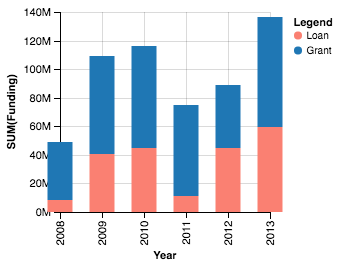

In [133]:
grants_chart

In [134]:
grants_count_chart = Chart(funding_bar_data).mark_bar( barSize=25).encode(
    color=Color('grant_loan',
        legend=Legend(
            title='Legend',
        ),
        scale=Scale(
            domain=['Loan', 'Grant'],
            range=['salmon', '#1f77b4'],
        )
    ),
    x=X('Year:T',
        axis=Axis(
            title='Year',
        ),
        timeUnit='year',
    ),
    y='count(Funding):Q',
).configure_cell(
    height=200,
    width=210
).configure_scale(bandSize=500)

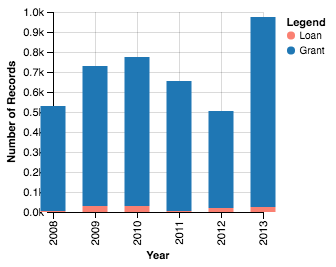

In [135]:
grants_count_chart

In [136]:
# rename columns
kyf2.rename(columns={'X': 'lon', 'Y':'lat'}, inplace=True)
# kyf2.reset_index(inplace=True)
# kyf_for_geocodio = kyf2[['index',  'lat', 'lon', 'Address', 'State', 'Town', 'Zip']]
# kyf_for_geocodio.to_csv('kyf2latlon1.csv', encoding='utf-8')


In [137]:
kyf2.head(2)

,Title,Name,Abbreviati,Year,Address,State,Town,Zip,Agency,Mission_Ar,...,Youth,Beginning Farmers,Organic,Blueberries,Heritage,Soilless,Logo/Branding,grant,loan,grant_loan
0,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2009-01-01,"Anchorage, AK",AK,Anchorage,,RBCS,Rural Development,...,0,0,0,0,0,0,0,1,0,Grant
1,Alaska Cooperative Development Program,Rural Cooperative Development Grants,RCDG,2010-01-01,"Anchorage, AK",AK,Anchorage,,RBCS,Rural Development,...,0,0,0,0,0,0,0,1,0,Grant


Drop blank Funding values

In [138]:

# kyf2['Funding'].hasnans
# nan_rows = kyf2[kyf2.Funding.isnull()]
# nanFunding_rows = kyf2.Funding.dropna(axis=0, inplace=True)
# nanFunding_rows
# print kyf2.sample(6).iloc[:, 10:-10:].head(12)

# kyf2 = kyf2[pd.notnull(kyf2['Funding'])]
# pd.notnull(kyf2['Funding'])

# determine if Funding row has null values
print np.where(pd.isnull(kyf2.Funding)), 'zero value for funding'

# Drop the nine records with no data for Funding
kyf2 = kyf2.dropna(subset=['Funding'])


(array([1014, 1707, 1922, 2436, 2836, 2995, 3494, 3513, 3938]),) zero value for funding


In [139]:
# create a file of all the awardees that were not geocoded
lon_zero = kyf2[kyf2['lon']==0.0]
lon_zero.to_csv('lon_zero.csv', encoding='utf-8')

In [140]:
# import the dataset of ungeocoded records
lon_zero4geocoding = pd.read_csv('lon_zero.csv', encoding='utf-8')
lon_zero4geocoding['Zip'] = lon_zero4geocoding.Zip.astype(str)
lon_zero4geocoding

,Unnamed: 0,Title,Name,Abbreviati,Year,Address,State,Town,Zip,Agency,...,Youth,Beginning Farmers,Organic,Blueberries,Heritage,Soilless,Logo/Branding,grant,loan,grant_loan
0,209,Southern Arizona Beekeeping and Honey Promotio...,Local Food Promotion Program,LFPP,2014-01-01,"4526 N. Anway, Rd.",AZ,Marana,85753,AMS,...,0,0,0,0,0,0,0,1,0,Grant
1,578,Sweetgrass Cooperative,Value-Added Producer Grants,VAPG,2011-01-01,"81223, Cotopaxi, CO",CO,Hillside,82132,RBCS,...,0,0,0,0,0,0,0,1,0,Grant
2,596,Downtown Norwich Farmer’s Market Operation Hea...,Farmers Market Promotion Program,FMPP,2014-01-01,77 Main Street,CT,Norwich,63605,AMS,...,0,0,0,0,0,0,0,1,0,Grant
3,603,"Hartford Mobile Market--Bringing Fresh, Local ...",Local Food Promotion Program,LFPP,2014-01-01,1 Congress Street,CT,Hartford,61141,AMS,...,0,0,0,0,0,0,0,1,0,Grant
4,613,Noank Community Market Local Meat Initiative,Local Food Promotion Program,LFPP,2014-01-01,17 Pearl Street,CT,Groton,63405,AMS,...,0,0,0,0,0,0,0,1,0,Grant
5,1385,CCK Commissary @ Pearl (CCKC@P): A social vent...,Local Food Promotion Program,LFPP,2014-01-01,594 Columbia Road,MA,Dorchester,21253,AMS,...,0,0,0,0,0,0,0,1,0,Grant
6,1438,Local Farms to Low Income Urban Communities: a...,Local Food Promotion Program,LFPP,2014-01-01,17 Ashmont Street,MA,Dorchester,21243,AMS,...,0,0,0,0,0,0,0,1,0,Grant
7,1475,Southern New England Meat Processing Initiative,Local Food Promotion Program,LFPP,2014-01-01,22 Jordan Rd.,MA,South Dartmouth,27481,AMS,...,0,0,0,0,0,0,0,1,0,Grant
8,1476,Southwestern Worcester County Food Hub Feasibi...,Local Food Promotion Program,LFPP,2014-01-01,2 Washington Square,MA,Worcester,16044,AMS,...,0,0,0,0,0,0,0,1,0,Grant
9,1508,"Butterbee Farm, LLC",Value-Added Producer Grants,VAPG,2014-01-01,1173 Goldfinch Lane,MD,MILLERSVILLE,21180,RBCS,...,0,0,0,0,0,0,0,1,0,Grant


In [158]:
address_cols = ['Unnamed: 0','Address','Town','State','Zip']
df = lon_zero4geocoding[address_cols]
df.reset_index(inplace=True)
df['full_address'] =  df['Address'] \
+", " + df['Town'] + ", " \
+ df['State'] + " " \
+ df['Zip']
df


/Users/marjorieroswell/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,index,Unnamed: 0,Address,Town,State,Zip,full_address
0,0,209,"4526 N. Anway, Rd.",Marana,AZ,85753,"4526 N. Anway, Rd., Marana, AZ 85753"
1,1,578,"81223, Cotopaxi, CO",Hillside,CO,82132,"81223, Cotopaxi, CO, Hillside, CO 82132"
2,2,596,77 Main Street,Norwich,CT,63605,"77 Main Street, Norwich, CT 63605"
3,3,603,1 Congress Street,Hartford,CT,61141,"1 Congress Street, Hartford, CT 61141"
4,4,613,17 Pearl Street,Groton,CT,63405,"17 Pearl Street, Groton, CT 63405"
5,5,1385,594 Columbia Road,Dorchester,MA,21253,"594 Columbia Road, Dorchester, MA 21253"
6,6,1438,17 Ashmont Street,Dorchester,MA,21243,"17 Ashmont Street, Dorchester, MA 21243"
7,7,1475,22 Jordan Rd.,South Dartmouth,MA,27481,"22 Jordan Rd., South Dartmouth, MA 27481"
8,8,1476,2 Washington Square,Worcester,MA,16044,"2 Washington Square, Worcester, MA 16044"
9,9,1508,1173 Goldfinch Lane,MILLERSVILLE,MD,21180,"1173 Goldfinch Lane, MILLERSVILLE, MD 21180"


In [159]:
#extract for list of index numbers for geocoding
lon_zero_list = df.iloc[:, -1].tolist()
lon_zero_list
# geocode the awardees that had a longitude of 0
geocoded = client.geocode(lon_zero_list)
geocoded


[u'4526 N. Anway, Rd., Marana, AZ 85753',
 u'81223, Cotopaxi, CO, Hillside, CO 82132',
 u'77 Main Street, Norwich, CT 63605',
 u'1 Congress Street, Hartford, CT 61141',
 u'17 Pearl Street, Groton, CT 63405',
 u'594 Columbia Road, Dorchester, MA 21253',
 u'17 Ashmont Street, Dorchester, MA 21243',
 u'22 Jordan Rd., South Dartmouth, MA 27481',
 u'2 Washington Square, Worcester, MA 16044',
 u'1173 Goldfinch Lane, MILLERSVILLE, MD 21180',
 u'97 Main Street, Belfast, ME 49156',
 u'608 GAGNON ROAD, Madawaksa, ME 47560',
 u'3121 Hotel Road, Auburn, ME 42111',
 u'04628, Dennysville, ME, Edmunds Twp, ME 4628',
 u'109 RIVER ROAD, Orrington, ME 44740',
 u'401 Chambers Bridge Road, Brick, NJ 87232',
 u'500 Pemberton-Browns Mills Road, Pemberton, NJ 80681',
 u'206 BRIDGETON ROAD, Elmer, NJ 83180',
 u'205 Claremont Avenue, Montclair, NJ 70423',
 u'450 Clinton Street, Woonsocket, RI 28953',
 u'1661 EAST WARREN ROAD, WAITSFIELD, VT 56730',
 u'195 North Main Street, White River Junction, VT 50017']

In [163]:
# create a DataFrame of latitudes and longitudes
# in the same order as the original extracted list
awardee_geocodes = {}
counter = 0
for awardee in geocoded:
    awardee_geocodes[counter] = {}

    results = awardee.values()[1][0]
    latitude = results['location']['lat']
    longitude = results['location']['lng']
    awardee_geocodes[counter]['latitude'] = latitude
    awardee_geocodes[counter]['longitude'] = longitude
    counter +=1
awardee_geocodes
awardee_geocodes_df = pd.DataFrame(awardee_geocodes).T
awardee_geocodes_df

# awardee_geocodes_df['coords']=tuple(zip(awardee_geocodes_df.latitude, awardee_geocodes_df.longitude))
# sample_loclist = geocoded['coords'].tolist()
# sample_loclist

,latitude,longitude
0,32.287767,-111.321275
1,38.265280,-105.611670
2,41.523525,-72.086211
3,41.752879,-72.675953
4,41.325004,-71.987876
5,42.317333,-71.065083
6,42.288417,-71.054441
7,41.532409,-70.999377
8,42.262307,-71.795076
9,39.045992,-76.640933


In [164]:
#append the latitude and longitude to the previously ungeocoded addresses
joined_geo_df = df.join(awardee_geocodes_df)
joined_geo_df.set_index('Unnamed: 0', inplace=True)
joined_geo_df

,index,Address,Town,State,Zip,full_address,latitude,longitude
Unnamed: 0,,,,,,,,
209,0,"4526 N. Anway, Rd.",Marana,AZ,85753,"4526 N. Anway, Rd., Marana, AZ 85753",32.287767,-111.321275
578,1,"81223, Cotopaxi, CO",Hillside,CO,82132,"81223, Cotopaxi, CO, Hillside, CO 82132",38.265280,-105.611670
596,2,77 Main Street,Norwich,CT,63605,"77 Main Street, Norwich, CT 63605",41.523525,-72.086211
603,3,1 Congress Street,Hartford,CT,61141,"1 Congress Street, Hartford, CT 61141",41.752879,-72.675953
613,4,17 Pearl Street,Groton,CT,63405,"17 Pearl Street, Groton, CT 63405",41.325004,-71.987876
1385,5,594 Columbia Road,Dorchester,MA,21253,"594 Columbia Road, Dorchester, MA 21253",42.317333,-71.065083
1438,6,17 Ashmont Street,Dorchester,MA,21243,"17 Ashmont Street, Dorchester, MA 21243",42.288417,-71.054441
1475,7,22 Jordan Rd.,South Dartmouth,MA,27481,"22 Jordan Rd., South Dartmouth, MA 27481",41.532409,-70.999377
1476,8,2 Washington Square,Worcester,MA,16044,"2 Washington Square, Worcester, MA 16044",42.262307,-71.795076


In [165]:
# create a list of indeces for updating
to_update_list = list(joined_geo_df.index.values)
to_update_list

[209,
 578,
 596,
 603,
 613,
 1385,
 1438,
 1475,
 1476,
 1508,
 1581,
 1590,
 1598,
 1613,
 1639,
 2438,
 2465,
 2478,
 2479,
 3244,
 3741,
 3793]

In [166]:
for idx in to_update_list:
    kyf2.loc[idx, 'lat'] = joined_geo_df.loc[idx, 'latitude']
    kyf2.loc[idx, 'lon'] = joined_geo_df.loc[idx, 'longitude']


In [168]:
lon_zero = kyf2[kyf2['lon']==0.0]
lon_zero[8:-12]
# kyf2[8:-12].head()

,Title,Name,Abbreviati,Year,Address,State,Town,Zip,Agency,Mission_Ar,...,Youth,Beginning Farmers,Organic,Blueberries,Heritage,Soilless,Logo/Branding,grant,loan,grant_loan


In [ ]:
# display first 3 records, not including the last 16 columns
# print kyf2.sample(6).iloc[:, 12::].head(12)
# kyf2.iloc[1014:, 10:-3:].head(4)
kyf2.iloc[1474:, 2:-13:].head(2)

In [ ]:
kyf2.dtypes

In [ ]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '${:,.2f}'.format
print pd.DataFrame(kyf2.groupby(['grant_loan']).Funding.mean()) \
.join(pd.DataFrame(kyf2.grant_loan.value_counts()))

In [ ]:
pd.options.display.float_format = None

1.4.3


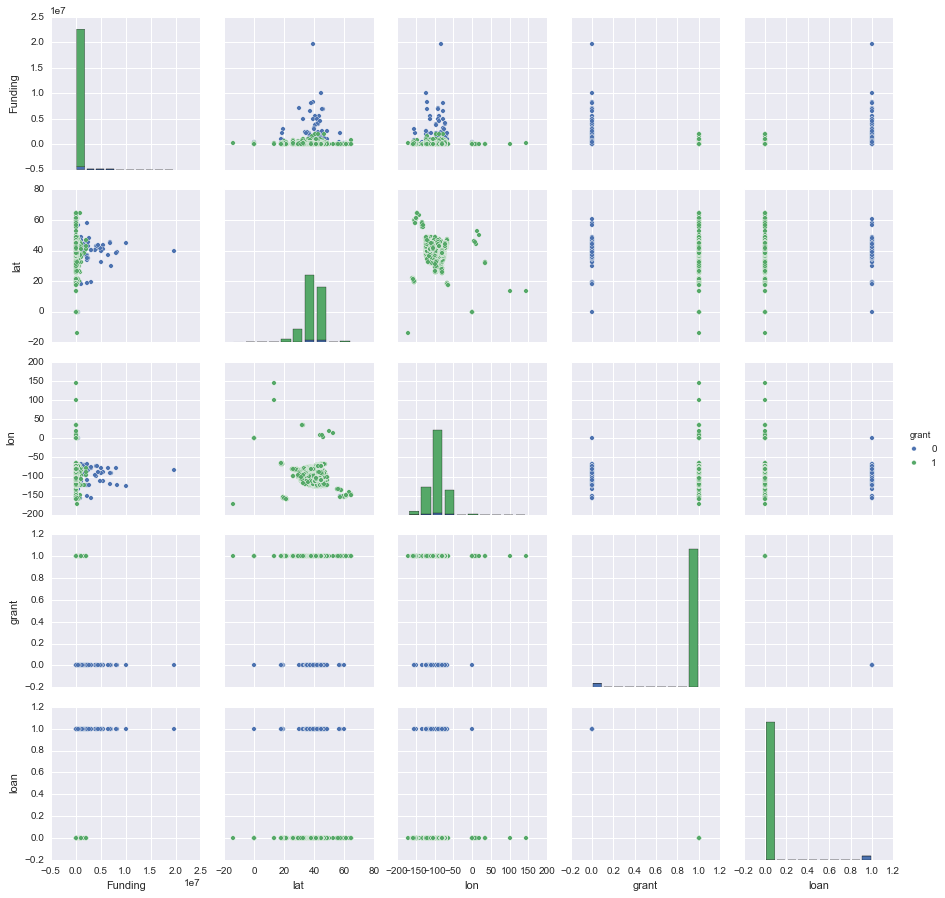

In [169]:
print matplotlib.__version__
pair_data_cols = ['Funding', 'lat', 'lon','grant','loan','Year']
kyf2_nums = kyf2[pair_data_cols]
# sns.pairplot(kyf2.iloc[:, :-14:], hue='grant_loan')

sns.pairplot(kyf2_nums, hue='grant')
# kyf2_nums

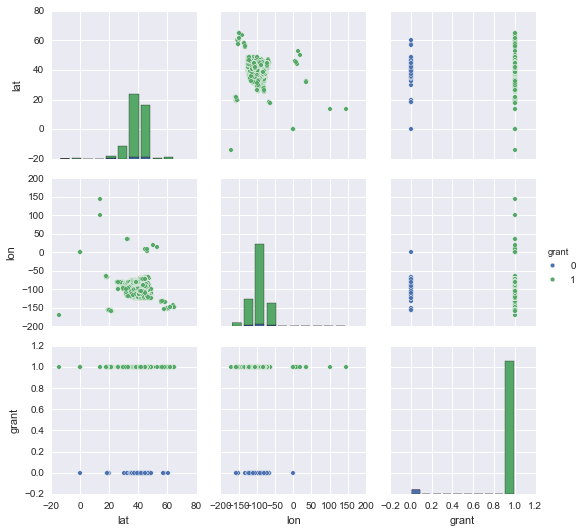

In [177]:
pair_data_cols = ['lat', 'lon', 'grant']
kyf2_nums = kyf2[pair_data_cols]
# sns.pairplot(kyf2.iloc[:, :-14:], hue='grant_loan')

sns.pairplot(kyf2_nums, hue='grant')

In [ ]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US')
# 'en_US'
locale.format("%d", 1255000, grouping=True)
# '1,255,000'

In [ ]:
# # sns.plt.ticklabel_format(style='plain', axis='both',useOffset=False)
# from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
# # ax = plt.gca()
# fig, ax = plt.subplots(1, 1)

# # ax.xaxis.set_major_formatter(FormatStrFormatter('$%0.2f'))
# fmt = '${x:,.0f}'
# # tick = StrMethodFormatter(fmt)
# ax.xaxis.set_major_formatter(fmt)


from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('${x:,.0f}'))
sns.distplot(kyf2['Funding'], kde=False, bins =100)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df = pd.DataFrame({'A': ['A', 'B'], 'B': [1000,2000]})

fig, ax = plt.subplots(1, 1, figsize=(2, 2))
df.plot(kind='bar', x='A', y='B',
        align='center', width=.5, edgecolor='none', 
        color='grey', ax=ax)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=25)

plt.show()

In [ ]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
plt.bar(x, money)
plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
plt.show()

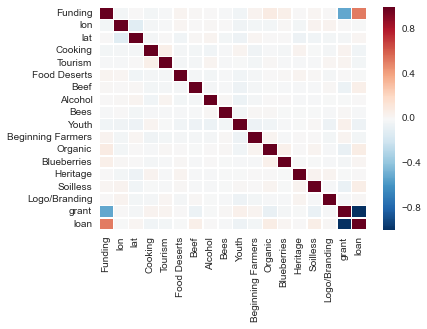

In [187]:
corr = kyf2.corr()
sns.heatmap(corr, linewidths= 0.25)

In [189]:
locations = kyf2[['lat', 'lon']].sample(60).head(100)
locationlist = locations.values.tolist()
print locations

            lat         lon
1595  44.311704  -69.790940
1916  38.952568  -92.325611
1567  38.962242  -76.912670
1664  42.375821  -83.044928
310   38.018325 -122.031908
2022  39.178048  -91.889869
3371  44.081160 -103.230891
1895  38.643301  -90.254800
4026  43.058106  -89.292456
1105  39.780310  -89.682389
3713  37.540700  -77.433652
2942  45.010737 -117.950538
1745  42.926963  -85.548781
1944  38.926912  -92.369901
2405  42.939634  -72.286277
4039  43.239750  -89.334241
2185  35.844474  -82.681047
1988  37.007971  -91.325509
3902  48.419517 -122.337832
2798  43.028448  -76.014614
1973  36.174119  -89.829511
11    61.599490 -149.121347
862   19.615761 -155.949341
3283  33.955314  -80.319827
1071  41.782311  -87.604099
3506  32.953241  -95.291781
1065  37.728582  -89.217169
2881  39.999637  -83.034566
4083  37.790150  -81.198570
4136  44.883567 -108.469871
723   25.476231  -80.465652
2634  44.242813  -76.086951
3218  41.863080  -71.399307
940   42.506059  -94.186346
1373  42.478711  -72

In [190]:
locations['coords']=tuple(zip(locations.lat, locations.lon))
loclist = locations['coords'].tolist()
# coordscol = locations['coords']
# coordscol.tolist
loclist

[(44.311703999999999, -69.790940000000006),
 (38.952567999999999, -92.325610999999995),
 (38.962242000000003, -76.912670000000006),
 (42.375821000000002, -83.044927999999999),
 (38.018324999999997, -122.031908),
 (39.178047999999997, -91.889869000000004),
 (44.081159999999997, -103.230891),
 (38.643301000000001, -90.254800000000003),
 (43.058106000000002, -89.292456000000001),
 (39.78031, -89.682389000000001),
 (37.540700000000001, -77.433651999999995),
 (45.010736999999999, -117.95053799999999),
 (42.926963000000001, -85.548781000000005),
 (38.926912000000002, -92.369900999999999),
 (42.939633999999998, -72.286276999999998),
 (43.239750000000001, -89.334241000000006),
 (35.844473999999998, -82.681047000000007),
 (37.007970999999998, -91.325508999999997),
 (48.419516999999999, -122.33783200000001),
 (43.028447999999997, -76.014613999999995),
 (36.174118999999997, -89.829510999999997),
 (61.599490000000003, -149.12134699999999),
 (19.615760999999999, -155.949341),
 (33.955314000000001, 

In [ ]:
locations['coords']

In [186]:
# Get two sample geocodes from each state
each_state = kyf2.groupby('State').head(2).loc[:, ["lat", 'lon']]
# sample_geo_2 = sample_geo.reset_index()

each_state['coords']=tuple(zip(each_state.lat, each_state.lon))
each_state_list = each_state['coords'].tolist()
each_state

# counter = 0
# geo_dict = {}
# for sampleloc in sample_geo_2:
#     geo_dict[counter] = {}
# #     geo_dict[counter]['latitude'] = sampleloc['latitude']
# #     geo_dict[counter]['longitude'] = sampleloc['longitude']
#     counter+=1
#     print sampleloc
# print geo_dict
each_state

,lat,lon,coords
0,61.217559,-149.858380,"(61.217559, -149.85838)"
1,61.217559,-149.858380,"(61.217559, -149.85838)"
53,32.421607,-86.228883,"(32.421607, -86.228883)"
54,32.378702,-86.278251,"(32.378702, -86.278251)"
114,34.758693,-92.386210,"(34.758693, -92.38621)"
115,34.746092,-92.277361,"(34.746092, -92.277361)"
156,0.000002,-0.000002,"(2e-06, -2e-06)"
157,0.000002,-0.000002,"(2e-06, -2e-06)"
159,35.629861,-109.064181,"(35.629861, -109.064181)"
160,32.377212,-112.862850,"(32.377212, -112.86285)"


In [185]:
# sample_states_geo = client.reverse(each_state_list, fields=['cd', 'stateleg', 'census'])
sample_states_geo.formatted_addresses

[u'1300 E 5th Ave, Anchorage, AK 99501',
 u'1300 E 5th Ave, Anchorage, AK 99501',
 u'2912 State Rte 53, Montgomery, AL 36110',
 u'100 S Maryland St, Montgomery, AL 36107',
 u'145 Natural Resource Dr, Little Rock, AR 72205',
 u'624 W 4th St, Little Rock, AR 72201',
 '',
 '',
 u'Window Rock, AZ 86515',
 u'125 E Cholla Ave, Ajo, AZ 85321',
 u'1024 10th St, Sacramento, CA 95814',
 u'1024 10th St, Sacramento, CA 95814',
 u'50 Panuard Ln, Hartsel, CO 80449',
 u'2396 Co Rd Kk, Fowler, CO 81039',
 u'775 Chapel St, New Haven, CT 06510',
 u'960 Main St, Manchester, CT 06040',
 u'1349 Newton St NW, Washington, DC 20010',
 u'1300 5th St NW, Washington, DC 20001',
 u'3432 N Dupont Hwy, Dover, DE 19901',
 u'3432 N Dupont Hwy, Dover, DE 19901',
 u'2800 S Adams St, Tallahassee, FL 32301',
 u'633 E University Ave, Gainesville, FL 32601',
 u'288 Capitol Ave SE, Atlanta, GA 30312',
 u'283 Field St, Athens, GA 30602',
 '',
 '',
 u'672 N Aohoku Pl, Hilo, HI 96720',
 u'117 Alaloa St, Kaneohe, HI 96744',
 u'

In [ ]:
samplegeo

In [ ]:
kyfgeo = client.reverse(loclist, fields=["cd", "stateleg", 'census'])
# kyfgeo.get('32.372458,-81.557286')
type(kyfgeo)
df_addresses = pd.DataFrame(kyfgeo.formatted_addresses)
df_addresses

In [209]:

details = {}
counter = 0
for counter , loc in enumerate(sample_states_geo):
    ln ='-----------------'
    try:
        details[counter] = {}
        results = loc.values()[0][0]
        fields = results['fields']
        census= fields['census']    

        census_year = census['census_year']
        state_fips = census['state_fips']
        county_fips = census['county_fips']
        place_fips = census['place_fips']
        tract_code = census['tract_code']
        block_code = census['block_code']
        block_group = census['block_group']

        accuracy = results['accuracy']
        accuracy_type = results['accuracy_type']
        details[counter]['census_year'] = census_year
        details[counter]['state_fips'] = state_fips
        details[counter]['county_fips'] = county_fips
        details[counter]['place_fips'] = place_fips
        details[counter]['tract_code'] = tract_code
        details[counter]['census_year'] = block_group
        details[counter]['accuracy'] = accuracy
        details[counter]['accuracy_type'] = accuracy_type
#     details[counter]['source'] = source    
        if loc.formatted_address[-8:-6] == 'DC':
            print ln, counter,ln

            print 'DCDCDCDCDCDCDC', loc
            counter += 1
        if loc.formatted_address[-8:-6] == 'AS':
            print ln, counter,ln

            print 'ASASASAS', loc
            print loc
            flds = loc.values()[0]['fields']    
            cd=flds['congressional_district']['district_number']
            details[counter] = {}
            details[counter]['cd'] = cd
            
        else:
            print ln, counter,ln
            print fields

            components = results['address_components']
            state = components['state']
            county = components['county']
            cd = fields['congressional_district']['district_number']
            try:
                sl = fields['state_legislative_districts']['house']['district_number']
            except KeyError:
                sl = -99
            su = fields['state_legislative_districts']['senate']['district_number']
            try:
                source = results['source']
            except KeyError:
                source = -99
            details[counter]['state'] = state

                
            details[counter]['cd'] = cd
            details[counter]['sl'] = sl
            details[counter]['su'] = su
            details[counter]['county'] = county
            
    except IndexError:
        print ln, counter,ln
        print 'there is no loc.values()[0][0]', loc
        
print details


# su = fields['state_legislative_districts']['senate']['district_number']
# sl = fields['state_legislative_districts']['house']['district_number']
# su_name = fields['state_legislative_districts']['senate']['name']
# sl_name = fields['state_legislative_districts']['house']['name']

# cty = results['address_components']['county']
# state = results['address_components']['state']




----------------- 0 -----------------
{u'state_legislative_districts': {u'senate': {u'name': u'State Senate District J', u'district_number': u'J'}, u'house': {u'name': u'State House District 20', u'district_number': u'20'}}, u'census': {u'county_fips': u'02020', u'block_code': u'1015', u'census_year': 2015, u'place_fips': u'0203000', u'state_fips': u'02', u'block_group': u'1', u'tract_code': u'000901'}, u'congressional_district': {u'congress_number': u'115th', u'congress_years': u'2017-2019', u'name': u'Congressional District (at Large)', u'district_number': 0}}
----------------- 1 -----------------
{u'state_legislative_districts': {u'senate': {u'name': u'State Senate District J', u'district_number': u'J'}, u'house': {u'name': u'State House District 20', u'district_number': u'20'}}, u'census': {u'county_fips': u'02020', u'block_code': u'1015', u'census_year': 2015, u'place_fips': u'0203000', u'state_fips': u'02', u'block_group': u'1', u'tract_code': u'000901'}, u'congressional_district

KeyError: 17

In [ ]:
# pr_location = client.reverse((-66.405977,18.454233), fields=["cd", "stateleg", "census"])
as_location = client.reverse((-14.278056,-170.7025), fields=["cd", "stateleg", "census"])
as_location

In [ ]:
fields = locations.values()[1][0]['fields']
cd = fields['congressional_district']['district_number']
sl = fields['state_legislative_districts']['house']['district_number']
su = fields['state_legislative_districts']['senate']['district_number']
type(fields)


locations.get('38.879138,-76.98187')[0]['congressional_district']

In [ ]:
geocoded_addresses[0]['results'][0]['location']

In [ ]:
sample_locations1 = client.reverse([
        (33.738987, -116.4083),
        (33.738987, -106.4083),
        (38.879138, -76.98187)
    ],  fields=["cd", "stateleg"])
sample_locations.lookups

In [ ]:
sample_locations.get((38.879138,-76.98187))

In [ ]:
sample_locations.formatted_addresses

In [ ]:
sample_locations

In [ ]:
# locations.get('')
sample_locations.get('results')

In [ ]:
'''
{
'4324': '(37.3256, -105.63459),
'4356': {'lat': 0, 'lon': 180, 'district': 4}
}
'''

In [ ]:
# withdistricts= client.geocode("3443 Guilford Terrace, Baltimore, MD 21218", fields=['cd', 'stateleg','census'])
# withdistricts= client.geocode("Pago Pago, AS 96799", fields=['cd', 'stateleg','census'])
withdistricts = client.reverse((-14.278056,-170.7025), fields=["cd", "stateleg", "census"])

# geo2.lookups
results = withdistricts.values()[0][0]
fields = results['fields']
census= fields['census']
cd = fields['congressional_district']['district_number']
# su = fields['state_legislative_districts']['senate']['district_number']
# sl = fields['state_legislative_districts']['house']['district_number']
# su_name = fields['state_legislative_districts']['senate']['name']
# sl_name = fields['state_legislative_districts']['house']['name']
cty = results['address_components']['county']
state = results['address_components']['state']
accuracy = results['accuracy']
accuracy_type = results['accuracy_type']
source = results['source']
census_year = census['census_year']
state_fips = census['state_fips']
county_fips = census['county_fips']
place_fips = census['place_fips']
tract_code = census['tract_code']
block_code = census['block_code']
block_group = census['block_group']

# withdistricts.accuracy
# withdistricts.values()
# # withdistricts.fields
withdistricts.values()
# print cd, su, sl, su_name, sl_name, cty, state, accuracy, accuracy_type, source, census_year,state_fips,county_fips,place_fips,tract_code,block_code,block_group
print cd, cty, state, accuracy, accuracy_type, source, census_year,state_fips,county_fips,place_fips,tract_code,block_code,block_group



In [ ]:
Chart(funding_bar_data).mark_bar().encode(
    X('Year:T', timeUnit='year'),
#     Y('Funding:Q', aggregate='sum'),
    y='sum(Funding):Q',
#     Color('grant_loan')
    color='grant_loan:N',
)

In [ ]:
Chart(kyf2).mark_bar().encode(
    x=X('Year:T', timeUnit='year'),
    y='count(*)',
    color='grant_loan',
)

In [ ]:
axis('equal');
pie(counts, labels=counts.index);
show()